In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Import API 
import gmaps

# Import up API Key from local file
from config import gkey

# Configure Google Maps API
gmaps.configure(gkey) 

from urllib.request import urlopen

import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [26]:
# I downloaded California Demographic Data from the census website (https://data.census.gov) 
# for Race/Enthicity demographics by all zip codes in California

# Create and load raw file for cleanup
raw_states_byrace_df = pd.read_csv('../resources/raw_states_byrace.csv')
raw_states_byrace_df

# Drop first row since it is not a useful header:
raw_states_byrace_df
header_row = 0

raw_states_byrace_df.columns = raw_states_byrace_df.iloc[header_row]
raw_states_byrace_df

raw_states_byrace_df = raw_states_byrace_df.drop(header_row)
raw_states_byrace_df

raw_states_byrace_df = raw_states_byrace_df.dropna(how='all') 
raw_states_byrace_df

raw_states_byrace_df = raw_states_byrace_df.fillna(0) 
raw_states_byrace_df

,id,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Total population,Percent Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population!!Male,Percent!!SEX AND AGE!!Total population!!Male,Percent Margin of Error!!SEX AND AGE!!Total population!!Male,...,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female"
1,0400000US01,Alabama,4876250,*****,4876250,(X),2359355,1270,48.4,0.1,...,3685074,(X),1749845,1904,47.5,0.1,1935229,1710,52.5,0.1
2,0400000US02,Alaska,737068,*****,737068,(X),384915,401,52.2,0.1,...,530996,(X),280398,696,52.8,0.1,250598,902,47.2,0.1
3,0400000US04,Arizona,7050299,*****,7050299,(X),3504509,349,49.7,0.1,...,4920449,(X),2422769,4358,49.2,0.1,2497680,3642,50.8,0.1
4,0400000US05,Arkansas,2999370,*****,2999370,(X),1471760,979,49.1,0.1,...,2207333,(X),1064813,1600,48.2,0.1,1142520,1442,51.8,0.1
5,0400000US06,California,39283497,*****,39283497,(X),19526298,1141,49.7,0.1,...,25494383,(X),12511445,16188,49.1,0.1,12982938,17244,50.9,0.1
6,0400000US08,Colorado,5610349,*****,5610349,(X),2823201,1044,50.3,0.1,...,4063877,(X),2029222,3678,49.9,0.1,2034655,2991,50.1,0.1
7,0400000US09,Connecticut,3575074,*****,3575074,(X),1744245,441,48.8,0.1,...,2605409,(X),1247280,3219,47.9,0.1,1358129,2314,52.1,0.1
8,0400000US10,Delaware,957248,*****,957248,(X),462890,166,48.4,0.1,...,710280,(X),337563,1175,47.5,0.1,372717,1028,52.5,0.1
9,0400000US11,District of Columbia,692683,*****,692683,(X),328644,74,47.4,0.1,...,519267,(X),241214,1290,46.5,0.1,278053,1495,53.5,0.1
10,0400000US12,Florida,20901636,*****,20901636,(X),10220813,1549,48.9,0.1,...,14988415,(X),7208765,11896,48.1,0.1,7779650,9945,51.9,0.1


In [27]:
#Select/Filter pertinent columns
raw_states_byrace_df = raw_states_byrace_df[['Geographic Area Name',                                              
               'Percent!!RACE!!Total population!!One race!!White', 
               'Percent!!RACE!!Total population!!One race!!Black or African American', 
               'Percent!!RACE!!Total population!!One race!!Asian',
               'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
               'Percent!!RACE!!Total population!!One race!!American Indian and Alaska Native']]

raw_states_byrace_df

,Geographic Area Name,Percent!!RACE!!Total population!!One race!!White,Percent!!RACE!!Total population!!One race!!Black or African American,Percent!!RACE!!Total population!!One race!!Asian,Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race),Percent!!RACE!!Total population!!One race!!American Indian and Alaska Native
1,Alabama,68.1,26.6,1.4,4.3,0.5
2,Alaska,64.6,3.3,6.2,7.0,14.9
3,Arizona,77.2,4.5,3.3,31.3,4.5
4,Arkansas,76.7,15.3,1.5,7.5,0.7
5,California,59.7,5.8,14.5,39.0,0.8
6,Colorado,84.0,4.2,3.2,21.5,1.0
7,Connecticut,75.9,10.7,4.5,16.1,0.3
8,Delaware,68.8,22.2,3.9,9.2,0.4
9,District of Columbia,41.3,46.3,4.0,11.0,0.3
10,Florida,75.1,16.1,2.7,25.6,0.3


In [28]:
raw_states_byrace_df = raw_states_byrace_df.rename(columns={'Geographic Area Name':'state_name', 
               'Percent!!RACE!!Total population!!One race!!White':'Percentage White', 
               'Percent!!RACE!!Total population!!One race!!Black or African American':'Percentage Black or African American', 
               'Percent!!RACE!!Total population!!One race!!Asian':'Percentage Asian',
               'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)':'Percentage Hispanic or Latino',
               'Percent!!RACE!!Total population!!One race!!American Indian and Alaska Native':'Percentage Native American'})
raw_states_byrace_df

,state_name,Percentage White,Percentage Black or African American,Percentage Asian,Percentage Hispanic or Latino,Percentage Native American
1,Alabama,68.1,26.6,1.4,4.3,0.5
2,Alaska,64.6,3.3,6.2,7.0,14.9
3,Arizona,77.2,4.5,3.3,31.3,4.5
4,Arkansas,76.7,15.3,1.5,7.5,0.7
5,California,59.7,5.8,14.5,39.0,0.8
6,Colorado,84.0,4.2,3.2,21.5,1.0
7,Connecticut,75.9,10.7,4.5,16.1,0.3
8,Delaware,68.8,22.2,3.9,9.2,0.4
9,District of Columbia,41.3,46.3,4.0,11.0,0.3
10,Florida,75.1,16.1,2.7,25.6,0.3


In [29]:
raw_states_byrace_df.replace(to_replace='-',
                        value=0,
                        inplace=True,
                        limit=None,
                        regex=False,
                        method='pad'
                        )

raw_states_byrace_df['Percentage White'] = pd.to_numeric(raw_states_byrace_df['Percentage White'])
raw_states_byrace_df['Percentage Black or African American'] = pd.to_numeric(raw_states_byrace_df['Percentage Black or African American'])
raw_states_byrace_df['Percentage Asian'] = pd.to_numeric(raw_states_byrace_df['Percentage Asian'])
raw_states_byrace_df['Percentage Hispanic or Latino'] = pd.to_numeric(raw_states_byrace_df['Percentage Hispanic or Latino'])
raw_states_byrace_df['Percentage Native American'] = pd.to_numeric(raw_states_byrace_df['Percentage Native American'])

states_byrace_df = raw_states_byrace_df

states_byrace_df.dtypes

0
state_name                               object
Percentage White                        float64
Percentage Black or African American    float64
Percentage Asian                        float64
Percentage Hispanic or Latino           float64
Percentage Native American              float64
dtype: object

In [30]:
states_byrace_df

,state_name,Percentage White,Percentage Black or African American,Percentage Asian,Percentage Hispanic or Latino,Percentage Native American
1,Alabama,68.1,26.6,1.4,4.3,0.5
2,Alaska,64.6,3.3,6.2,7.0,14.9
3,Arizona,77.2,4.5,3.3,31.3,4.5
4,Arkansas,76.7,15.3,1.5,7.5,0.7
5,California,59.7,5.8,14.5,39.0,0.8
6,Colorado,84.0,4.2,3.2,21.5,1.0
7,Connecticut,75.9,10.7,4.5,16.1,0.3
8,Delaware,68.8,22.2,3.9,9.2,0.4
9,District of Columbia,41.3,46.3,4.0,11.0,0.3
10,Florida,75.1,16.1,2.7,25.6,0.3


In [31]:
statecodes_df = pd.read_csv('../resources/model_state.csv')
statecodes_df = statecodes_df[['STUSAB',                                              
               'STATE_NAME']]

statecodes_df = statecodes_df.rename(columns={'STUSAB':'state_code',
                                             'STATE_NAME':'state_name'})

clean_states_byrace_df = raw_states_byrace_df.merge(statecodes_df, on='state_name', how = 'outer')
clean_states_byrace_df

,state_name,Percentage White,Percentage Black or African American,Percentage Asian,Percentage Hispanic or Latino,Percentage Native American,state_code
0,Alabama,68.1,26.6,1.4,4.3,0.5,AL
1,Alaska,64.6,3.3,6.2,7.0,14.9,NaN
2,Arizona,77.2,4.5,3.3,31.3,4.5,AZ
3,Arkansas,76.7,15.3,1.5,7.5,0.7,AR
4,California,59.7,5.8,14.5,39.0,0.8,CA
5,Colorado,84.0,4.2,3.2,21.5,1.0,CO
6,Connecticut,75.9,10.7,4.5,16.1,0.3,CT
7,Delaware,68.8,22.2,3.9,9.2,0.4,DE
8,District of Columbia,41.3,46.3,4.0,11.0,0.3,NaN
9,Florida,75.1,16.1,2.7,25.6,0.3,FL


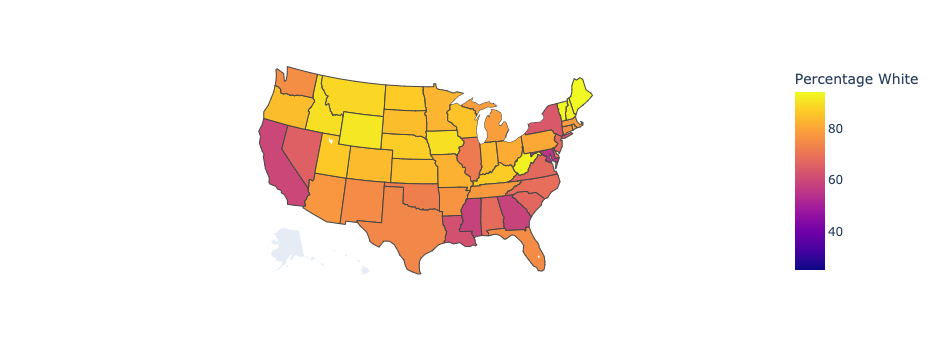

In [33]:
fig_white = px.choropleth(clean_states_byrace_df,
              locations = "state_code",
              locationmode = "USA-states",
              hover_name= "state_name",
              color = "Percentage White", scope ="usa")

fig_white.show()

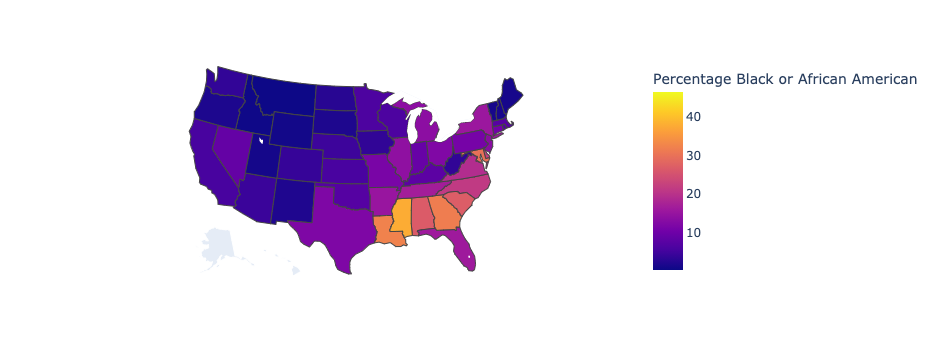

In [23]:
fig_Black_or_African_American = px.choropleth(clean_states_byrace_df,
              locations = "state_code",
              locationmode = "USA-states",
              hover_name= "state_name",
              color = "Percentage Black or African American", scope ="usa")

fig_Black_or_African_American.show()

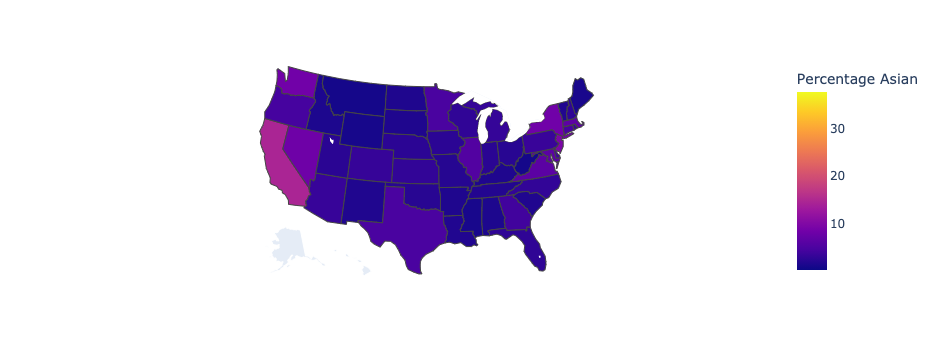

In [19]:
fig_Asian = px.choropleth(clean_states_byrace_df,
              locations = "state_code",
              locationmode = "USA-states",
              hover_name= "state_name",
              color = "Percentage Asian", scope ="usa")


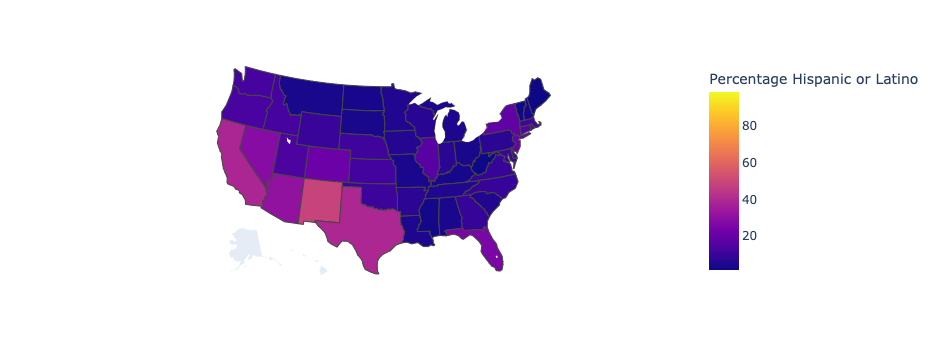

In [18]:
fig_Hispanic_or_Latino = px.choropleth(clean_states_byrace_df,
              locations = "state_code",
              locationmode = "USA-states",
              hover_name= "state_name",
              color = "Percentage Hispanic or Latino", scope ="usa")

fig_Hispanic_or_Latino.show()

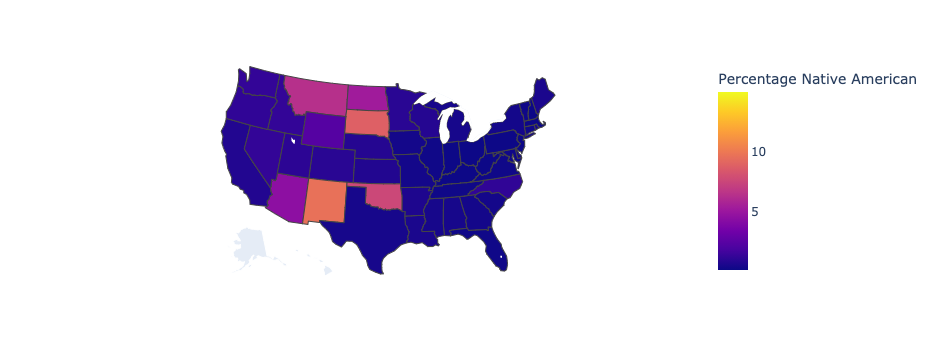

In [20]:
fig_Native_American = px.choropleth(clean_states_byrace_df,
              locations = "state_code",
              locationmode = "USA-states",
              hover_name= "state_name",
              color = "Percentage Native American", scope ="usa")

fig_Native_American.show()